## CS663 - Machine Learning
### Armen Khachatrian
### KNN

>  IRIS DATASET

In [ ]:
import pandas as pd

train_df = pd.read_csv('iris-train.data', header=None)
test_df = pd.read_csv('iris-test.data', header=None)
test_df.head()

,0,1,2,3,4
0,5.0,3.5,1.6,0.6,0
1,5.1,3.8,1.9,0.4,0
2,4.8,3.0,1.4,0.3,0
3,5.1,3.8,1.6,0.2,0
4,4.6,3.2,1.4,0.2,0


In [ ]:
train_x = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]
test_x = test_df.iloc[:,:-1]
test_y = test_df.iloc[:,-1]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=50)
clf.fit(train_x, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(clf.predict(test_x), test_y)

1.0

> SPIRAL DATASET

In [ ]:
spiral_train = pd.read_csv('spiral-train1.txt', header=None)
spiral_test = pd.read_csv('spiral-test.txt', header=None)
spiral_test.head()

,0,1,2
0,0.006456,0.039885,0
1,0.004187,0.050331,0
2,0.001634,0.070688,0
3,0.056388,0.095740,0
4,0.038288,0.115006,0


In [ ]:
spiral_train.head()

,0,1,2
0,0.002428,0.020056,0
1,0.000438,0.030300,0
2,0.035561,0.049077,0
3,0.038891,0.070834,0
4,0.026560,0.086943,0


In [ ]:
train_x = spiral_train.iloc[:,:-1]
train_y = spiral_train.iloc[:,-1]
test_x = spiral_test.iloc[:,:-1]
test_y = spiral_test.iloc[:,-1]

In [ ]:
test_y.head()

0    0
1    0
2    0
3    0
4    0
Name: 2, dtype: int64

> Cross Validation

In [ ]:
spiral_val = pd.read_csv('spiral-dev.txt', header=None)
spiral_val.head()

,0,1,2
0,0.088400,0.135297,0
1,0.174942,0.152871,0
2,0.340908,0.126543,0
3,0.358322,0.137613,0
4,0.371794,0.130222,0


In [ ]:
val_x = spiral_val.iloc[:,:-1]
val_y = spiral_val.iloc[:,-1]

In [ ]:
# empty list that will hold cv scores
scores = []
neighbors = list(range(1, 40, 1))
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_x, train_y)
    scores.append(accuracy_score(knn.predict(val_x), val_y))    

In [ ]:
scores

[0.975609756097561,
 0.975609756097561,
 1.0,
 0.975609756097561,
 1.0,
 1.0,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 1.0,
 1.0,
 0.975609756097561,
 1.0,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.975609756097561,
 0.9512195121951219,
 0.9512195121951219,
 0.9512195121951219,
 0.926829268292683,
 0.926829268292683,
 0.9512195121951219,
 0.926829268292683,
 0.926829268292683,
 0.926829268292683,
 0.9024390243902439,
 0.926829268292683,
 0.926829268292683,
 0.926829268292683,
 0.9024390243902439,
 0.926829268292683,
 0.9024390243902439,
 0.9024390243902439,
 0.8780487804878049]

In [ ]:
# changing to misclassification error
mse = [1 - x for x in scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

The optimal number of neighbors is 3


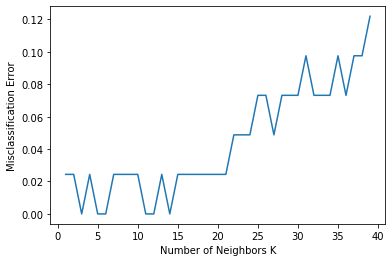

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

In [ ]:
clf_spiral = KNeighborsClassifier(n_neighbors=3)
clf_spiral.fit(train_x, train_y)
accuracy_score(clf_spiral.predict(test_x), test_y)

1.0

End.